<h1><center>Diabetes - Classification & Prediction </center></h1>

## Abstract
Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. Learning how to use Machine Learning can help us predict Diabetes.

Keywords: python, seaborn, numpy, plotly, pandas, matplotlib, scikit-learning, decision tree, random forest, logistic regression, machine learning, supervised learning

## About this Project
This project seeks to better understand the various factors that affect diabetes and their relationship with each other.  The project will also use various machine learning techniques to predict various life expectancies by country and other indicators and provide the metrics needed to evaluate the predictions.

<li>The objective of this project is to classify whether someone has diabetes or not.</li>
<li>Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)</li>
<li>The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'</li>
<li>The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).</li>


## The Data
This dataset is a part of a large dataset held at the National Institute of Diabetes and Digestive and Kidney Diseases and was obtained through https://data.world/

The target variable is specified as "outcome", where 1 indicates a positive result of the diabetes test and 0 indicates a negative result.

A machine learning model is requested to be developed that can predict whether individuals have diabetes or not when their features are given. Before developing the model, performing the necessary data analysis and feature engineering steps are expected.

### There are 9 variables in the dataset:

<li>Pregnancies: Number of pregnancies.</li>
<li>Glucose: 2-hour plasma glucose concentration during an oral glucose tolerance test.</li>
<li>Blood Pressure: Blood Pressure (Diastolic) (mm Hg).</li>
<li>SkinThickness : Thickness of skin</li>
<li>Insulin: 2-Hour Serum Insulin (mu U/ml)</li>
<li>DiabetesPedigreeFunction: Function (2-hour plasma glucose concentration during an oral glucose tolerance test).</li>
<li>BMI: Body Mass Index (weight in kg/(height in meters)^2)</li>
<li>Age: Persons age(in years)</li>
<li>Outcome: Having diabetes status (1: diabetes, 0: no diabetes)</li>

## Importing Python libraries

In [1]:
# Import libraries
import os
import csv

# Import packages for EDA and Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Visualizatioin
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
import dataframe_image as dfi
from IPython.display import Image

#Statistical Functions
from IPython.display import display, HTML
from scipy.stats import stats
from scipy.stats.mstats import winsorize

# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image 

# Model Traning and Feature Exploration / Engineering 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import mstats
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

# Linear Models & Metrics
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, \
    classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from ydata_profiling import ProfileReport

# K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Support Vector Machine
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Decision Tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus

SEED = 42  # random seed for modeling




## Loading the Dataset

In [2]:
# GLOBAL VARIABLES
# Load data into pandas data frame
pd.set_option('display.width', 480)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.max_columns", 20)
df = pd.read_csv('diabetes.csv')
feature_cols = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

wins_df = pd.DataFrame()  # Winsorized dataframe holder

wins_dict = {}  # Winsorized feature dictionary
#feature_vars = list(df.columns)[:8]  # List of numerical features

# Check for directory called charts, create it if it doesn't exist
directory = "charts"

if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Directory '{directory}' created.")
else:
    print(f"Directory '{directory}' already exists.")

Directory 'charts' already exists.


## Exploratory Data Analysis

In exploratory data analysis, the type of the variables (e.g. integer or decimal) is first printed, the sum of the missing values (either null or na) is calculated, and it is found that no such value exists.
In addition, some statistical measures are calculated to understand their variation. Some of these statistical measures are the mean of each column, the median, the standard deviation, the percentages, etc.

### Understanding the Dataset

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100                     0.167   21        0
4            0      137             40             35      168 43.100                     2.288   33        1

In [7]:
df.tail(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.900                     0.171   63        0
764            2      122             70             27        0 36.800                     0.340   27        0
765            5      121             72             23      112 26.200                     0.245   30        0
766            1      126             60              0        0 30.100                     0.349   47        1
767            1       93             70             31        0 30.400                     0.315   23        0

In [8]:
# Write charts to image files
def view_df_to_image(text_body, file_name):
    df_styled = text_body.style.background_gradient()  # Style the text
    dfi.export(df_styled, 'charts/' + file_name + '.png')  # Create image of text
    
# Write dataframe info to images
dfi.export(pd.DataFrame(df.dtypes).style.background_gradient(), 'charts/Orig_Column_Headings.png')

text_body = df.head(5)
view_df_to_image(text_body, 'Head(5)')
df_styled = text_body.style.background_gradient()  # Style the text
dfi.export(df_styled, 'charts/' + 'Head(5)' + '.png')  # Create image of text

text_body = df.tail(5)
view_df_to_image(text_body, 'Tail(5)')
df_styled = text_body.style.background_gradient()  # Style the text
dfi.export(df_styled, 'charts/' + 'Tail(5)' + '.png')  # Create image of text

In [9]:
# Check for duplicate values
df.duplicated().any()

False

No duplicates records found, we have a clean dataframe.

In [10]:
# Describe view stats on dataframe
df.describe().T

count    mean     std    min    25%     50%     75%     max
Pregnancies              768.000   3.845   3.370  0.000  1.000   3.000   6.000  17.000
Glucose                  768.000 120.895  31.973  0.000 99.000 117.000 140.250 199.000
BloodPressure            768.000  69.105  19.356  0.000 62.000  72.000  80.000 122.000
SkinThickness            768.000  20.536  15.952  0.000  0.000  23.000  32.000  99.000
Insulin                  768.000  79.799 115.244  0.000  0.000  30.500 127.250 846.000
BMI                      768.000  31.993   7.884  0.000 27.300  32.000  36.600  67.100
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.244   0.372   0.626   2.420
Age                      768.000  33.241  11.760 21.000 24.000  29.000  41.000  81.000
Outcome                  768.000   0.349   0.477  0.000  0.000   0.000   1.000   1.000

<b>Conclusion:</b> We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846 with a mean of only 79.80. We have to treat outliers. Skinthickness also shows a large variance between the mean of 20.53 and the max of 99.

### Univariant Analysis (Five - Point Summary)

Now we will examine the distrubtion of all the attributes in the dataset by Outcome - the dark blue data points.

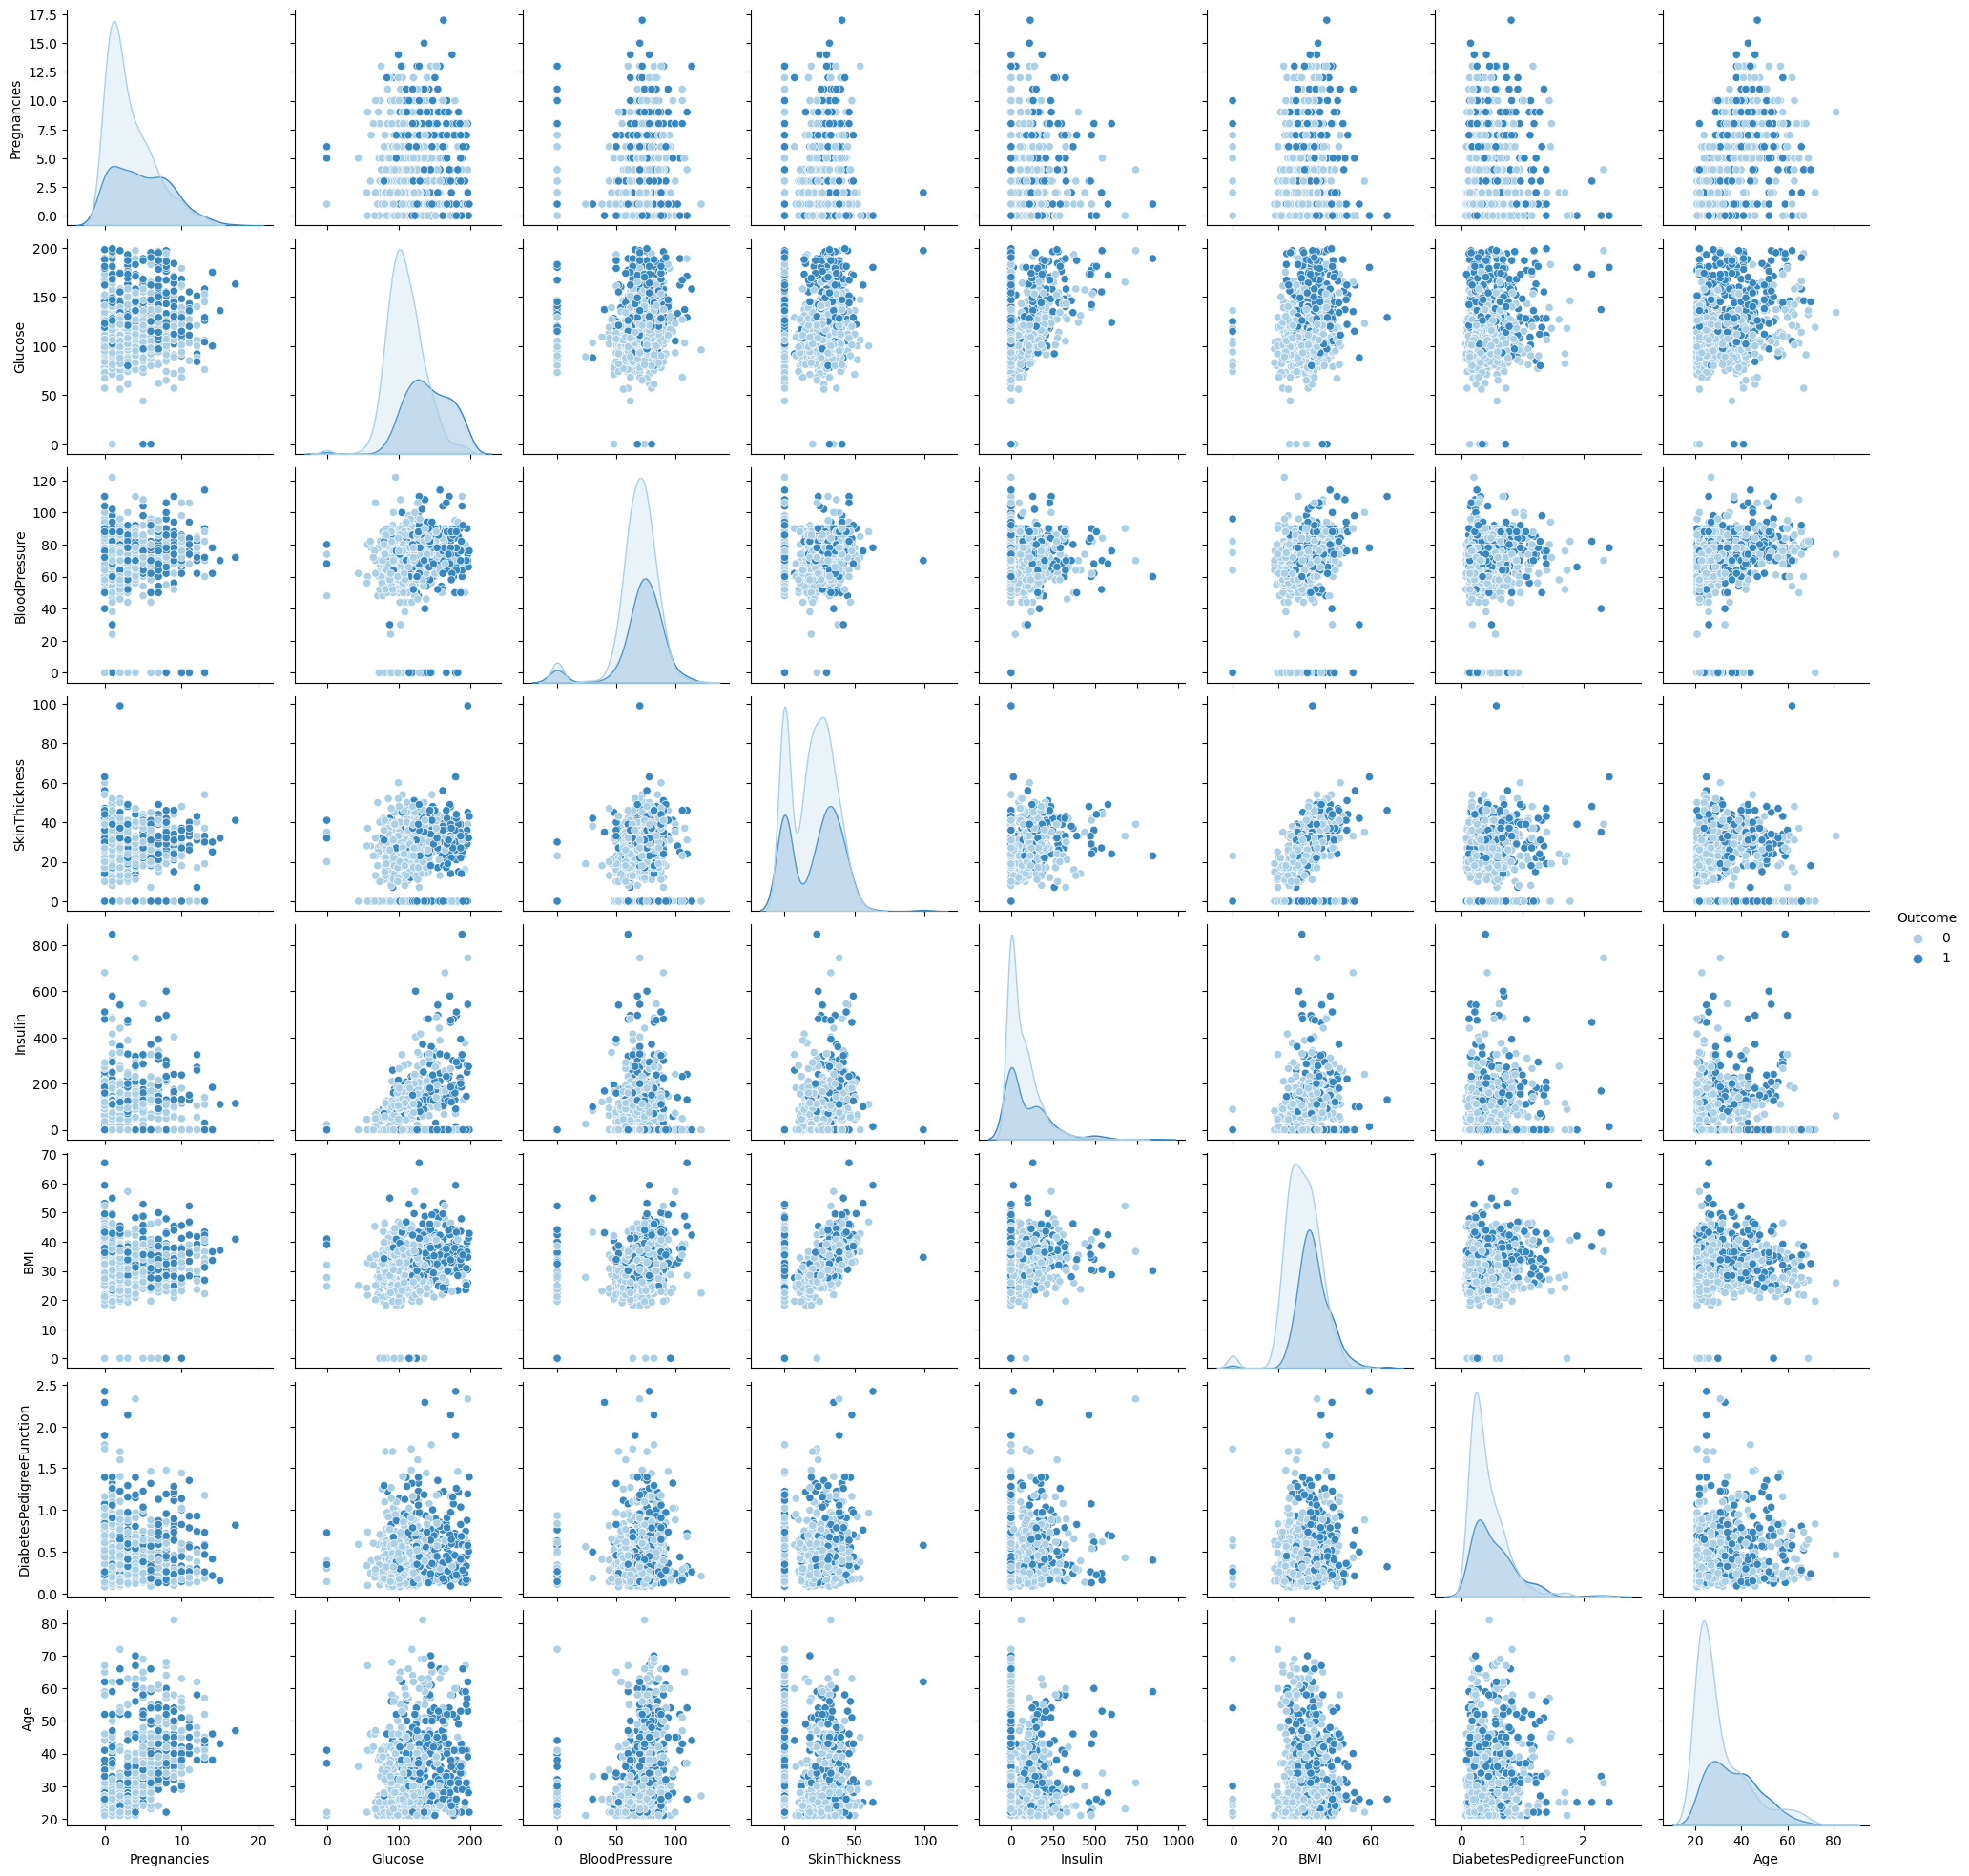

In [11]:
sns.pairplot(df, hue='Outcome', palette="Blues")
plt.show()

Here are a few observations:

<li>There are less younger women that have diabetes, compared to women in their 30s-50s.</li>
<li>Women that have diabetes have higher BMI.</li>
<li>Diabetes pedigree function is lower for women that have diabetes; Same thing with insulin & glucose.</li>
<li>Pregnacies are also lower among women that have diabetes.</li>
<li>There are outliers present in almost all of the attributes.</li>

<b>Note:</b> Women are those known to have had pregnacies

### Data Cleaning

<li>Dropping duplicate values</li>
<li>Checking NULL values</li>
<li>Checking for 0 value and replacing it. It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.</li>

#### Duplicate Records

In [12]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

## Null Summary
Missing values can exist when we have nulls, but there can also be erroneous missing values when the values appear to be inexplicit. Inexplicit nulls may require a more discretion when deciding how to deal with them as they may still represent actual data. "isnull" reveals that we have no null values.

In [13]:
# NULLS
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
#def null_summary():
na_values = df.isna().sum().reset_index()  # Find NA values
na_values.columns = ["Features", "Missing_Values"]
na_values["Missing_Percent"] = round(na_values.Missing_Values / len(df) * 100, 2)
print("Summarize NULLS: \n", na_values[na_values.Missing_Values > 0])

df_nulls = na_values[na_values.Missing_Values > 0]
dfi.export(pd.DataFrame(df_nulls).style.background_gradient(), 'charts/Summarize_Nulls.png')  # Print to image
df.info()  

Summarize NULLS: 
 Empty DataFrame
Columns: [Features, Missing_Values, Missing_Percent]
Index: []
<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


Checking for 0 values in 5 columns, Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace, also number of pregnancies as 0 is possible as observed in df.describe

In [15]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


<b>Conclusion:</b> Some of the columns have a skewed distribution, so the mean is more affected by outliers than the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.

## Missing Value Imputation 

#### Before Imputation

With imputation we are looking for zero values in 4 specific columns - bloodPressure, BMI, glucose, and skinthickness as none of them should contains zero values. Columns like insulin and pregnancies may legitimately contain zero values. 

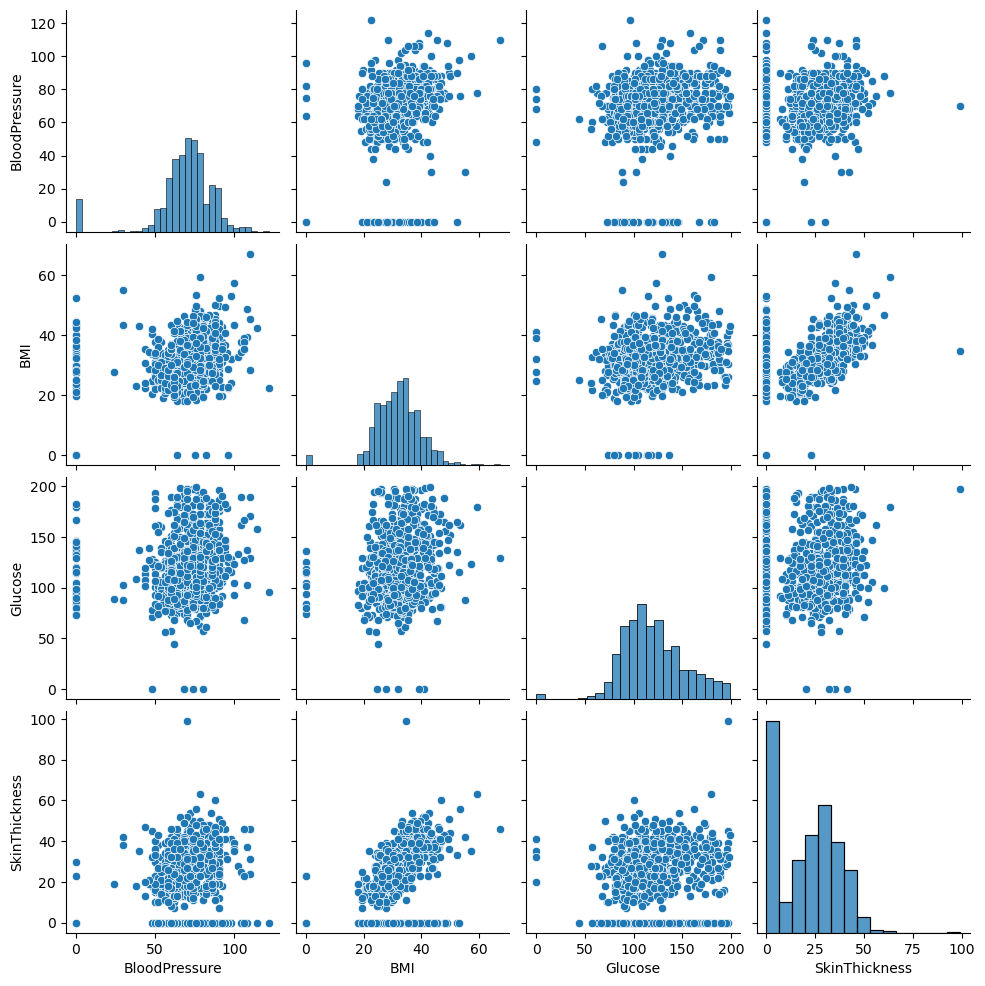

In [16]:
# Define columns with missing values
missing_colsDF = df[['BloodPressure','BMI', 'Glucose', 'SkinThickness']]
    
# Show the pairplot
sns.pairplot(missing_colsDF)
plt.show()

Looking at the charts above we can see all the zero values 

To address the zero values we'll imputate them with median values.

In [17]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

#### After Imputation

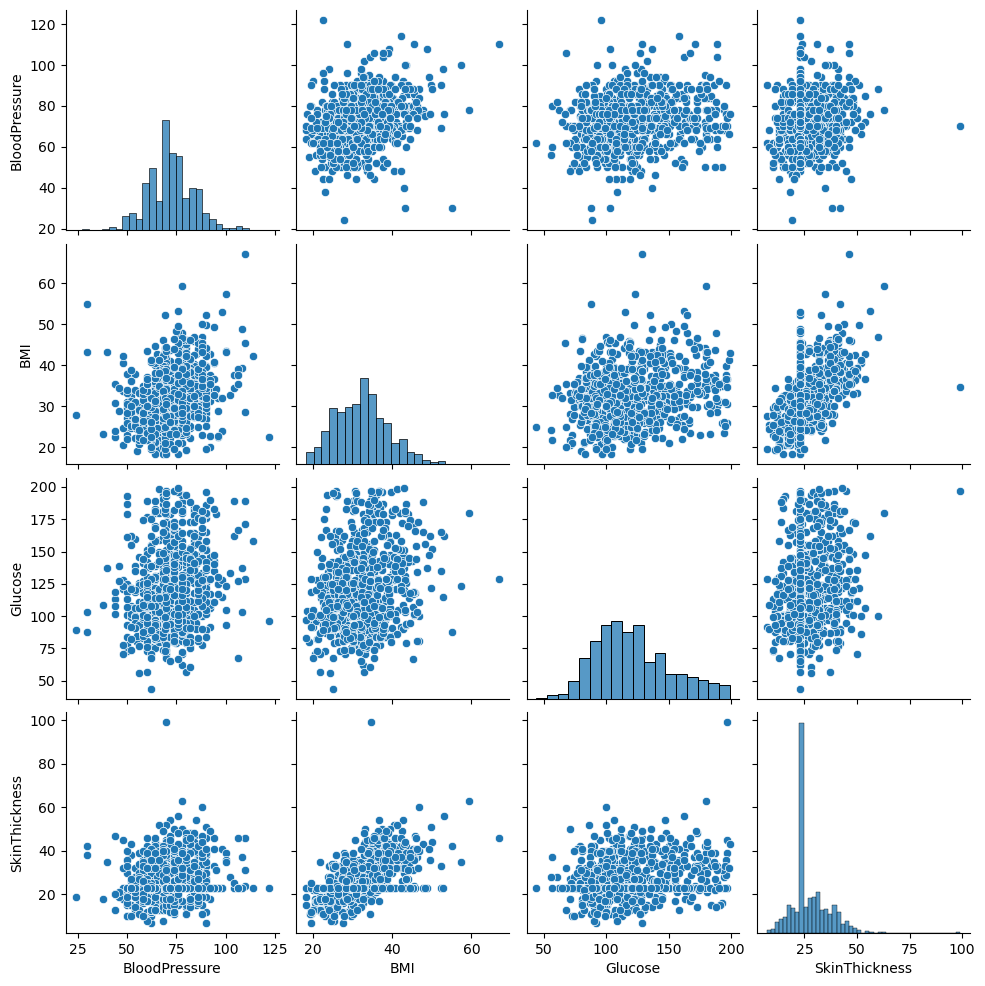

In [18]:
# Define columns with missing values
missing_colsDF = df[['BloodPressure','BMI', 'Glucose', 'SkinThickness']]
    
# Show the pairplot
sns.pairplot(missing_colsDF)
plt.show()

Comparing the before and after imputation charts we can see the disappearance of the zero values givng us more reliable data.

### Data Visualization
Here we are going to plot:
<li>Count Plot: to see if the dataset is balanced or not</li>
<li>Histograms: to see if data is normally distributed or skewed</li>
<li>Box Plot: to analyse the distribution and see the outliers</li>
<li>Scatter plots: to understand relationship between any two variables</li>
<li>Pair plot: to create scatter plot between all the variables</li>

### Binary Classification Imbalance
Next, let's take a look at the proportion of classes. We can view the outcome distrubution and counts with bar and pie charts.  0 = no diabetes while 1 equals diabetes present. 

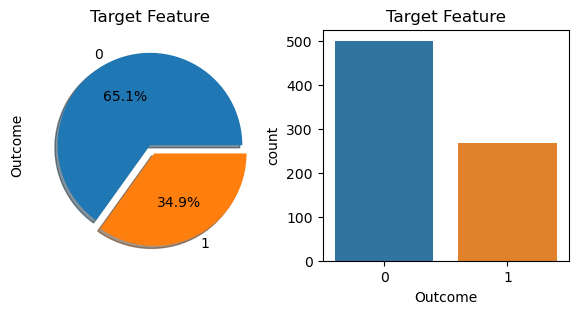

In [19]:
f,ax=plt.subplots(1,2,figsize=(7,3))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target Feature')
#ax[0].set_ylabel('Outcome')
sns.countplot(x='Outcome',data=df)
ax[1].set_title('Target Feature')
plt.show()

<b>Conclusion:</b> We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

## Correlations

Pearson's Correlation Coefficient : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

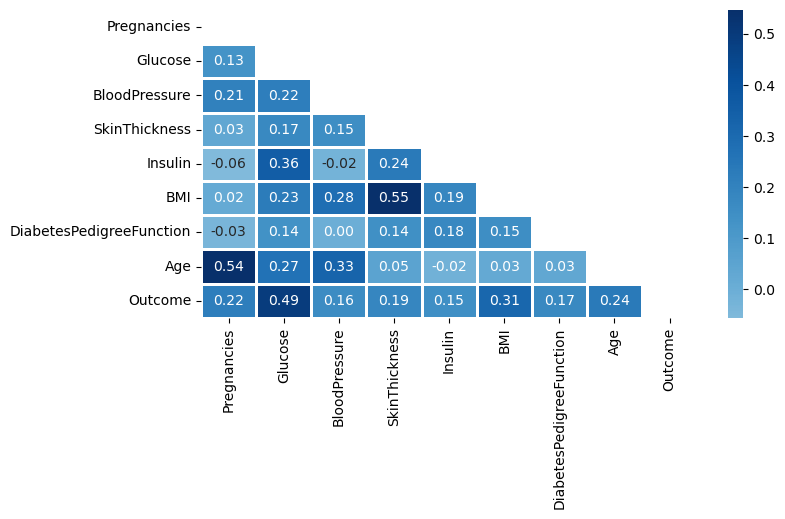

In [20]:
# Create the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
plt.figure(figsize = (8,4))
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f", cmap="Blues")
plt.show()

<b>Conclusion:</b> Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated so we can drop them.

#### Drop least correlated features

In [21]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [22]:
x=df_selected
quantile = QuantileTransformer(n_quantiles=len(df), random_state=0)
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
#df_new.columns =['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age']
df_new.columns =['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age', 'Outcome']
df_new.head()

a:\Anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Pregnancies  Glucose  SkinThickness   BMI   Age  Outcome
0        0.748    0.810          0.802 0.591 0.890    1.000
1        0.233    0.091          0.645 0.213 0.559    0.000
2        0.864    0.957          0.358 0.078 0.585    1.000
3        0.233    0.125          0.358 0.284 0.000    0.000
4        0.000    0.722          0.802 0.927 0.606    1.000

## Outliers

Outliers are the extreme value within the dataset and can have a big impact on statistical analysis as the can impact calculations like mean and standard deviation. 

First we'll view a quick numerical breakdown followed by histograms and boxpolots.

In [23]:
#outlier_summary(),  count outliers and plot
with open('charts/Outlier_Summary.txt', mode='w', newline='') as outlier_file:
    outlier_writer = csv.writer(outlier_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for col in df_new.columns: # was feature.cols
        q75, q25 = np.percentile(df[col], [75, 25])
        iqr = q75 - q25
        min_val = q25 - (iqr * 1.5)
        max_val = q75 + (iqr * 1.5)
        count = len(np.where((df[col] > max_val) | (df[col] < min_val))[0])
        percent = round(count / len(df[col]) * 100, 2)

        total_chars = 45
        len_first_chars = 7
        len_col = len(col)
        chars_needed = total_chars - len_col - len_first_chars

        print(len_first_chars * '-' + col + ' Outliers' + chars_needed * '-')
        print('Count: {}'.format(count))
        print('Percentage of Data: {}%'.format(percent))

        outlier_writer.writerow([len_first_chars * '-' + col + ' Outliers' + chars_needed * '-'])
        outlier_writer.writerow(['Count: {}'.format(count)])
        outlier_writer.writerow(['Percentage of Data: {}%'.format(percent)])
        outlier_writer.writerow(' ')

-------Pregnancies Outliers---------------------------
Count: 4
Percentage of Data: 0.52%
-------Glucose Outliers-------------------------------
Count: 0
Percentage of Data: 0.0%
-------SkinThickness Outliers-------------------------
Count: 35
Percentage of Data: 4.56%
-------BMI Outliers-----------------------------------
Count: 8
Percentage of Data: 1.04%
-------Age Outliers-----------------------------------
Count: 9
Percentage of Data: 1.17%
-------Outcome Outliers-------------------------------
Count: 0
Percentage of Data: 0.0%


#### Boxplots for Outliers

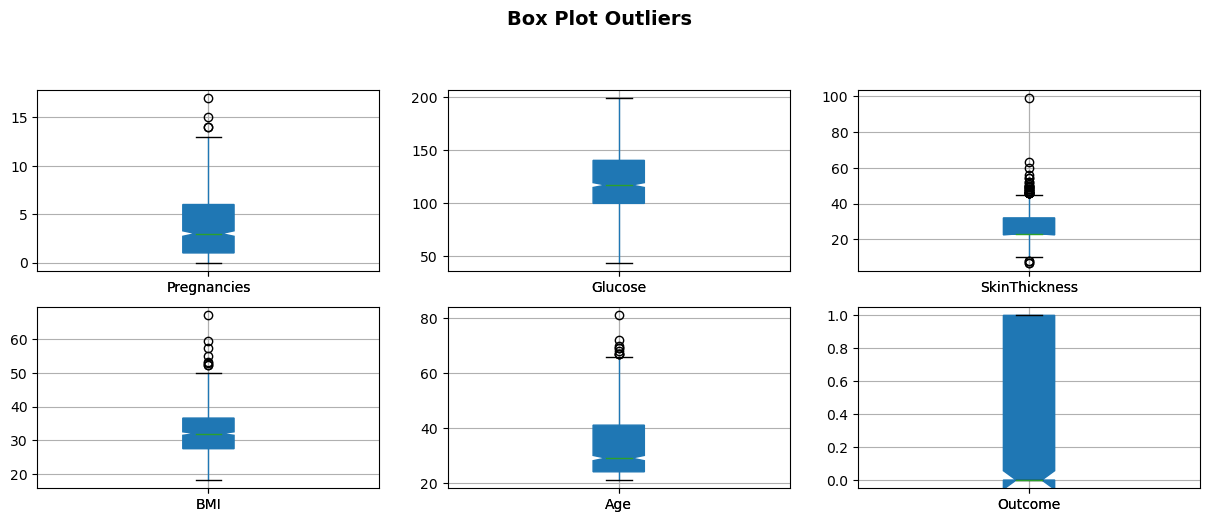

In [24]:
# Box plots for the potential outliers
%matplotlib inline
plt.figure(figsize=(15, 8))
for i, col in enumerate(df_new.columns, start=1):
    plt.subplot(3, 3, i)
    plt.xticks([1, 2, 3, 4, 5, 6], df_new.columns)
    df.boxplot(col, notch=True, patch_artist=True)

plt.suptitle('Box Plot Outliers', fontsize=14, verticalalignment='top', horizontalalignment='center',
                fontweight='bold')
plt.savefig('charts/BoxPlot_Outliers.png', dpi=None, facecolor='w', edgecolor='g', orientation='landscape',
            format=None, transparent=False, bbox_inches=None, pad_inches=0.10, metadata=None)
plt.show()

Outliers are unusual values in a dataset and they can distort statistical analyses and violate their assumptions.  Hence, it is important to deal with them. Removing outliers can cause data loss so we have to deal with it using various scaling or transformation techniques.

Each feature's box represents it's 50% of the data's interquartile range.  In this case we can ignore the binary target variable (Outcome) boxplot for the most part, there are better ways to describe this target such as the Binary Classification Imbalance section above.  

<b>Observations:</b>
<li>For pregnancies, the 1st 25% quartile has a very low as is the inter quartile range and median.  This of course is because more women will have 0-1 pregancies than 5-10, for instance.  The outliers are in the 12-15 range. No significant skews observed. Because 12-15 pregnancies is a reality there is not reason to remove these outliers.<\li>
<li>Glucose displays a normal distribution with the inter quartile and with no significant skew or outliers.<\li>
<li>SkinThinkess show us a tight inter quartile but with significant outliers.<\li>        
<li>The BMI feature significant outliers past the maximum quartile with a normal distribution with the inter quartile. The outliers are most like not bad data.<\li>    
<li>Age is much like BMI with the outliers being logincally emplainable.<\li>        


Next we'll use a sctter matrix to visualize the relationship between the multiple variables in the dataset.

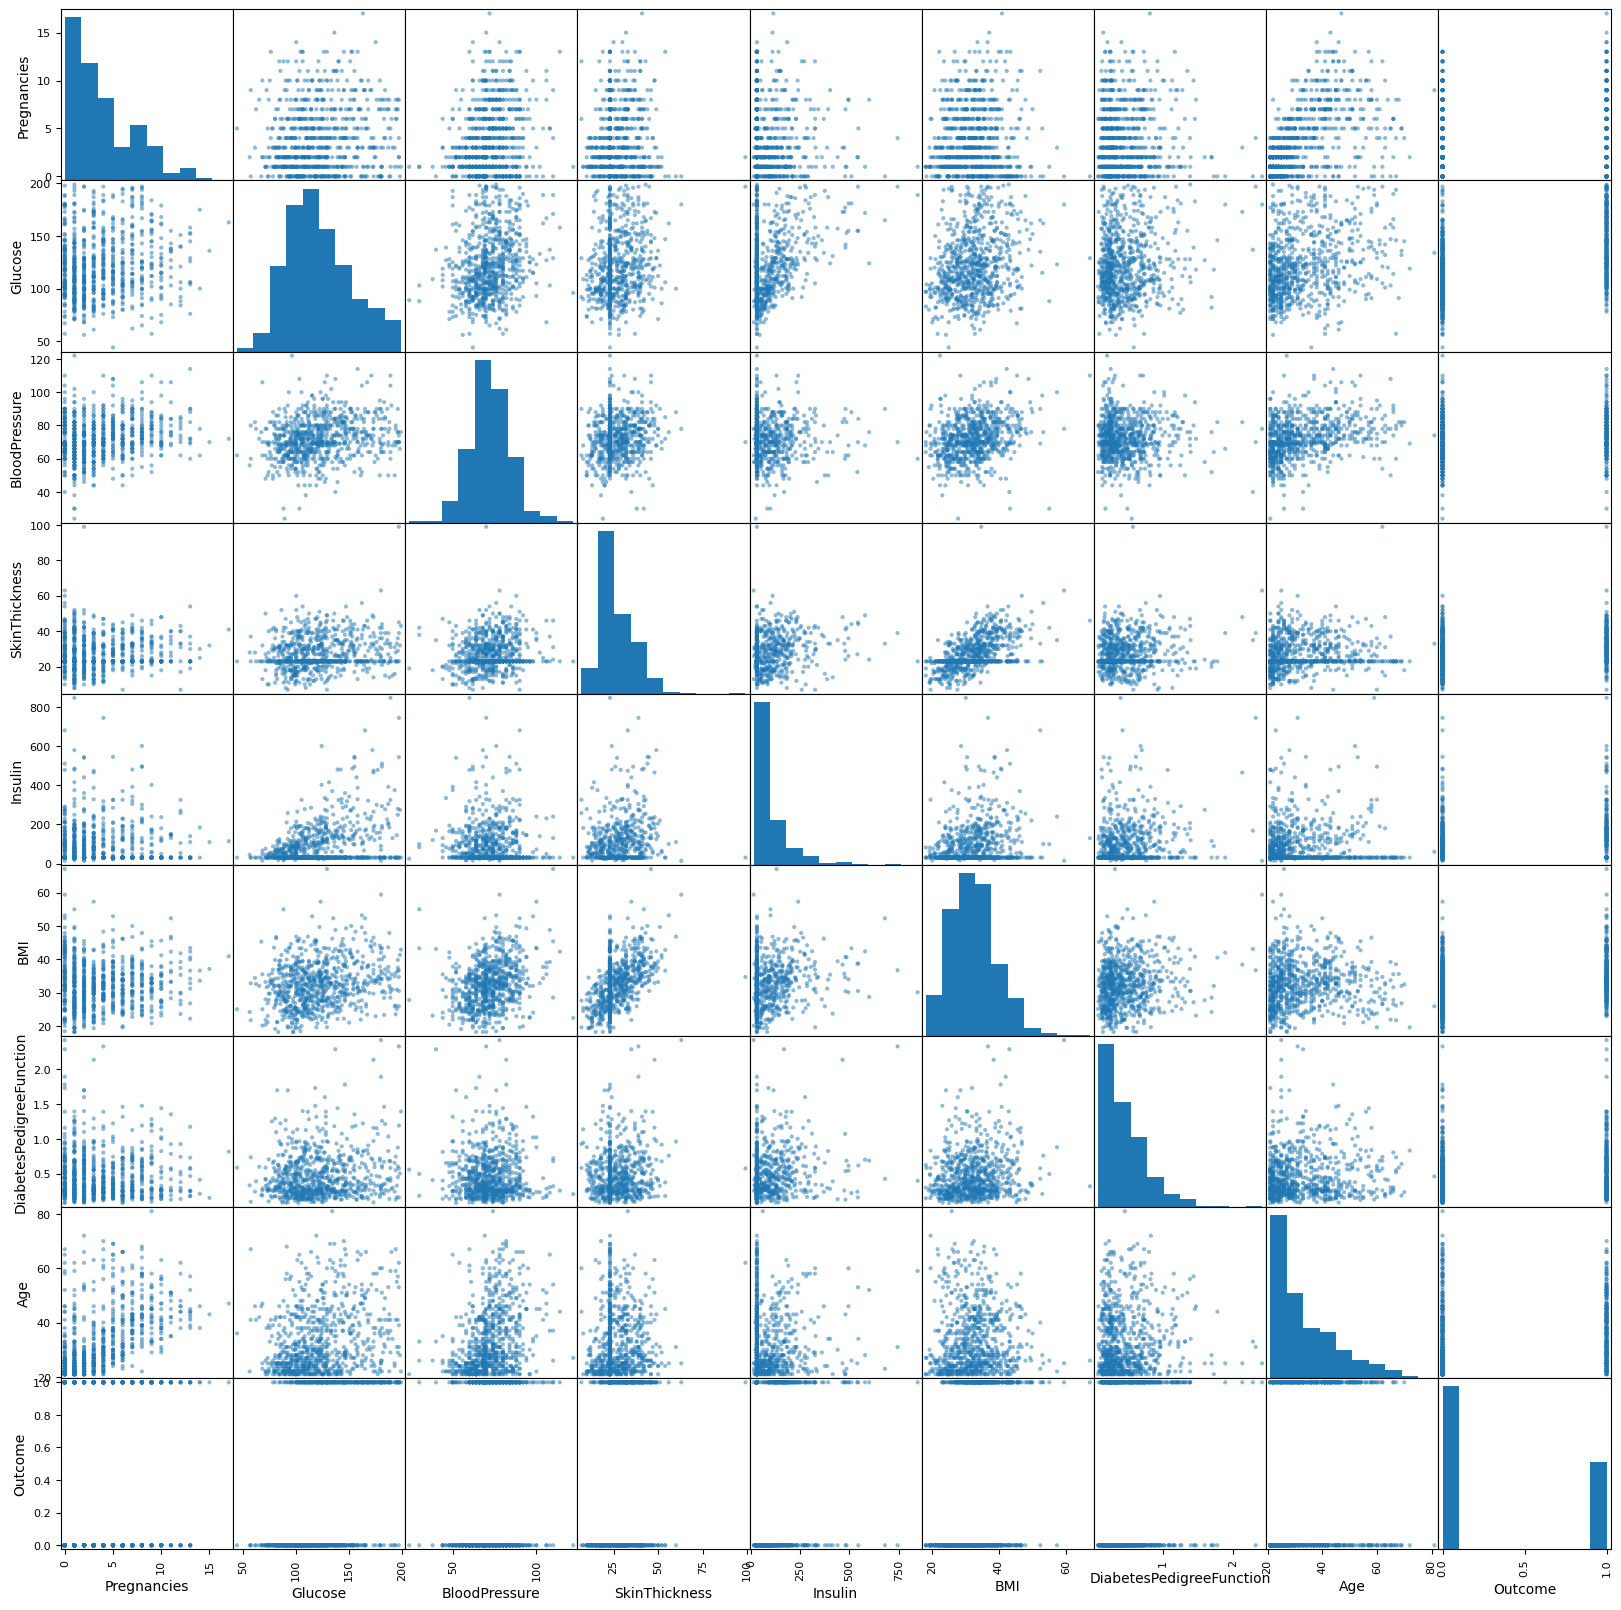

In [25]:
scatter_matrix(df,figsize=(20,20));

<b>Observations:</b>

<li>If we observe pregnancies with insulin, we can conclude that women with higher number of pregnancies have lower insulin.</li>
<li>There are more pregnancies the younger a women is which is logical.</li>
<li>There is a much lower rate of DiabetesPedegreeFunction with a lower age.  This could indicate that people live a shorter life with DiabetesPedegreeFunction.</li>
<li>Much like DiabetesPedegreeFunction, Glucose is higher amoung yourger people.  Possible because shorter lives or living healthier as people age.</li>

## Train, Test, and Evaluate Model 
So here we are, ready to model and predict!  In this section we'll walk through logistical regression, linear regression, multiple regression, polynomial regression, decision tree, random forest.

### Create Training Data

Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size.

In [26]:
target_name='Outcome'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [27]:
X.head() # contains only independent features 

Pregnancies  Glucose  SkinThickness   BMI   Age
0        0.748    0.810          0.802 0.591 0.890
1        0.233    0.091          0.645 0.213 0.559
2        0.864    0.957          0.358 0.078 0.585
3        0.233    0.125          0.358 0.284 0.000
4        0.000    0.722          0.802 0.927 0.606

In [28]:
y.head() #contains dependent feature

0   1.000
1   0.000
2   1.000
3   0.000
4   1.000
Name: Outcome, dtype: float64

Next let's split the dataset into training set and test set, 80% training, 20% testing.

In [29]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [31]:
X_test.shape,y_test.shape

((154, 5), (154,))

The dataset containing 768 records has been split in 624 training records and 154 test records

## Predictive and Classification Algorithms

<li>KNN</li>
<li>Naive Bayes</li>
<li>SVM</li>
<li>Decision Tree</li>
<li>Random Forest</li>
<li>Logistic Regression</li>

### K-Nearest Neighbors
KNN is used next as a non-parametric algorithm that will classify the data points based on their proximity and association to other available data.  KNN is a type of instance-based learning where the function is only approximated locally and all computation is deferred until function evaluation. KNN relies on distance for classification and assumes that similar things are near to each other that nonsimilar things.

In [32]:
# List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

# Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [33]:
best_model = grid_search.fit(X_train,y_train)

The most important KNN hyperparameter is the number of neighbors.

In [34]:
# Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 19


In [35]:
# Predict testing set
knn_pred = best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       107
         1.0       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154


 Confusion Matrix:



<AxesSubplot:>

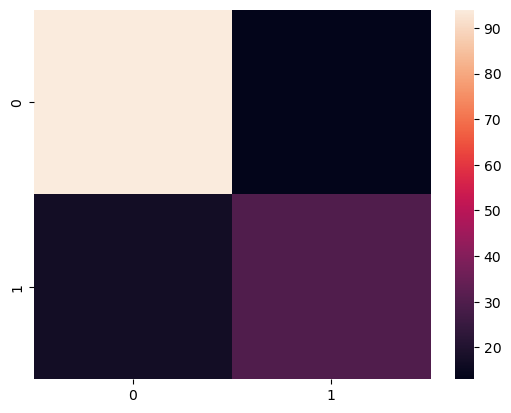

In [36]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

<b>Observations for K-Nearest Neighbors Model:</b>

<li>The precision scores which represents the classifiers ability to predict correct predictions relative to total positive predictions. This means that out of all the people in the dataset the model says that 70% had diabetes</li>
<li>The recall scores which represents correct positive predictions relative to total actual positives. Out of all the people that actually did have diabet, the model only predicted this outcome correctly for 36% of those people.</li>
<li>The F1 score represent a weighted mean of precision and recall. The closer to 1 the better the score. In this case the F1 score is .67</li>


### Naive Bayes

Naive Bayes is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. This means that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result

In [37]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [38]:
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [39]:
nb_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       107
         1.0       0.64      0.53      0.58        47

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154


 Confusion Matrix:



<AxesSubplot:>

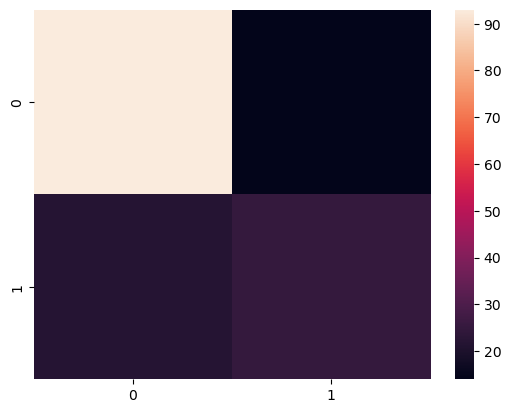

In [40]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

<b>Observations for Naive Bayes Model:</b>

<li>Precision: Out of all the people in the dataset the model says that 64% had diabetes.</li>
<li>Recall: The model only predicted this outcome correctly for 54% of those people.</li>
<li>In this case the F1 score is only .58, a far cry from a perfect 1 score.</li>


### Support Vector Machine
It is typically leveraged for classification problems, constructing a hyperplane where the distance between two classes of data points is at its maximum. This hyperplane is known as the decision boundary, separating the classes of data points (e.g., has diabetes vs doesn't have diabetes ) on either side of the plane.

In [41]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [42]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [43]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [44]:
grid_result = grid_search.fit(X, y)

In [45]:
svm_pred=grid_result.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       107
         1.0       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154


 Confusion Matrix:



<AxesSubplot:>

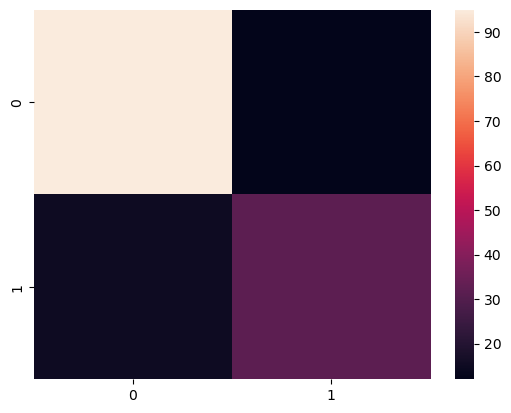

In [46]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

<b>Observations for Support Vector Machine:</b>

<li>Precision: Out of all the people in the dataset the SVM model says that 73% had diabetes.</li>
<li>Recall: The model only predicted this outcome correctly for 68% of those people.</li>
<li>In this case the F1 score is only .70, a far cry from a perfect 1 score.</li>

print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

### Logistic Regression
Because we're dealing with a binary dependant variable (Outcome), we'll use logisctic regression rather than linear.

In [47]:
reg = LogisticRegression()
reg.fit(X_train,y_train)   

LogisticRegression()

In [48]:
lr_pred=reg.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154


 Confusion Matrix:



<AxesSubplot:>

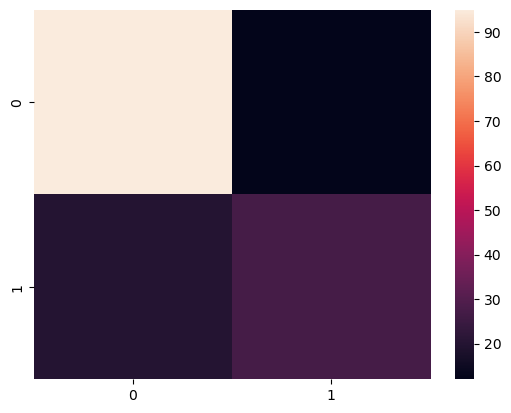

In [49]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))

<b>Observations for Logictic Regression:</b>

<li>Precision: Out of all the people in the dataset the Logictic Regression model says that 69% had diabetes.</li>
<li>Recall: The model only predicted this outcome correctly for 57% of those people.</li>
<li>In this case the F1 score is only .63, a far cry from a perfect 1 score.</li>       

### Decision Tree

In [50]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [51]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [52]:
best_model=grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [53]:
dt_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 Confusion Matrix:



<AxesSubplot:>

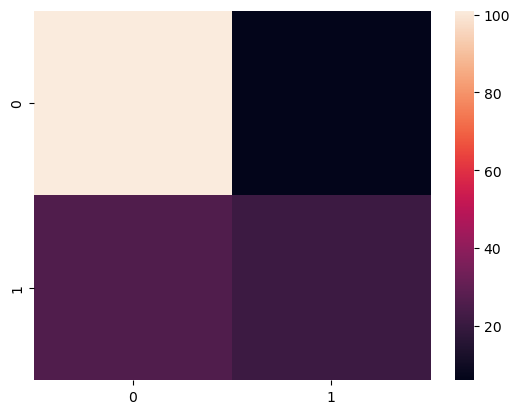

In [54]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

<b>Observations for Decision Tree Classification Report:</b>

<li>Precision: Out of all the people in the dataset the Decision Tree model says that 78% had diabetes.</li>
<li>Recall: The model only predicted this outcome correctly for 45% of those people.</li>
<li>In this case the F1 score is only .57, a far cry from a perfect 1 score.</li>     

In [55]:
# Feature variables
X=df_new.drop(['Outcome'], axis=1)
X

Pregnancies  Glucose  SkinThickness   BMI   Age
0          0.748    0.810          0.802 0.591 0.890
1          0.233    0.091          0.645 0.213 0.559
2          0.864    0.957          0.358 0.078 0.585
3          0.233    0.125          0.358 0.284 0.000
4          0.000    0.722          0.802 0.927 0.606
..           ...      ...            ...   ...   ...
763        0.941    0.278          0.978 0.553 0.977
764        0.387    0.562          0.592 0.761 0.412
765        0.678    0.550          0.358 0.199 0.529
766        0.233    0.620          0.358 0.386 0.867
767        0.233    0.171          0.703 0.399 0.200

[768 rows x 5 columns]

## Visualizing with Decision Tree

In [56]:
#col_names = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose', 'SkinThickness']
#df_dt = pd.read_csv("diabetes.csv", header=None, names=col_names)
#df_dt = pd.read_csv("diabetes.csv", header=None)
df_dt=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

df_dt.head()

Pregnancies  Glucose  SkinThickness    BMI  Age  Outcome
0            6  148.000             35 33.600   50        1
1            1   85.000             29 26.600   31        0
2            8  183.000             23 23.300   32        1
3            1   89.000             23 28.100   21        0
4            0  137.000             35 43.100   33        1

## Feature Selection

In [57]:
# split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age']
X = df_dt[feature_cols] # Features
y = df_dt.Outcome # Target variable


In [58]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [59]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [60]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


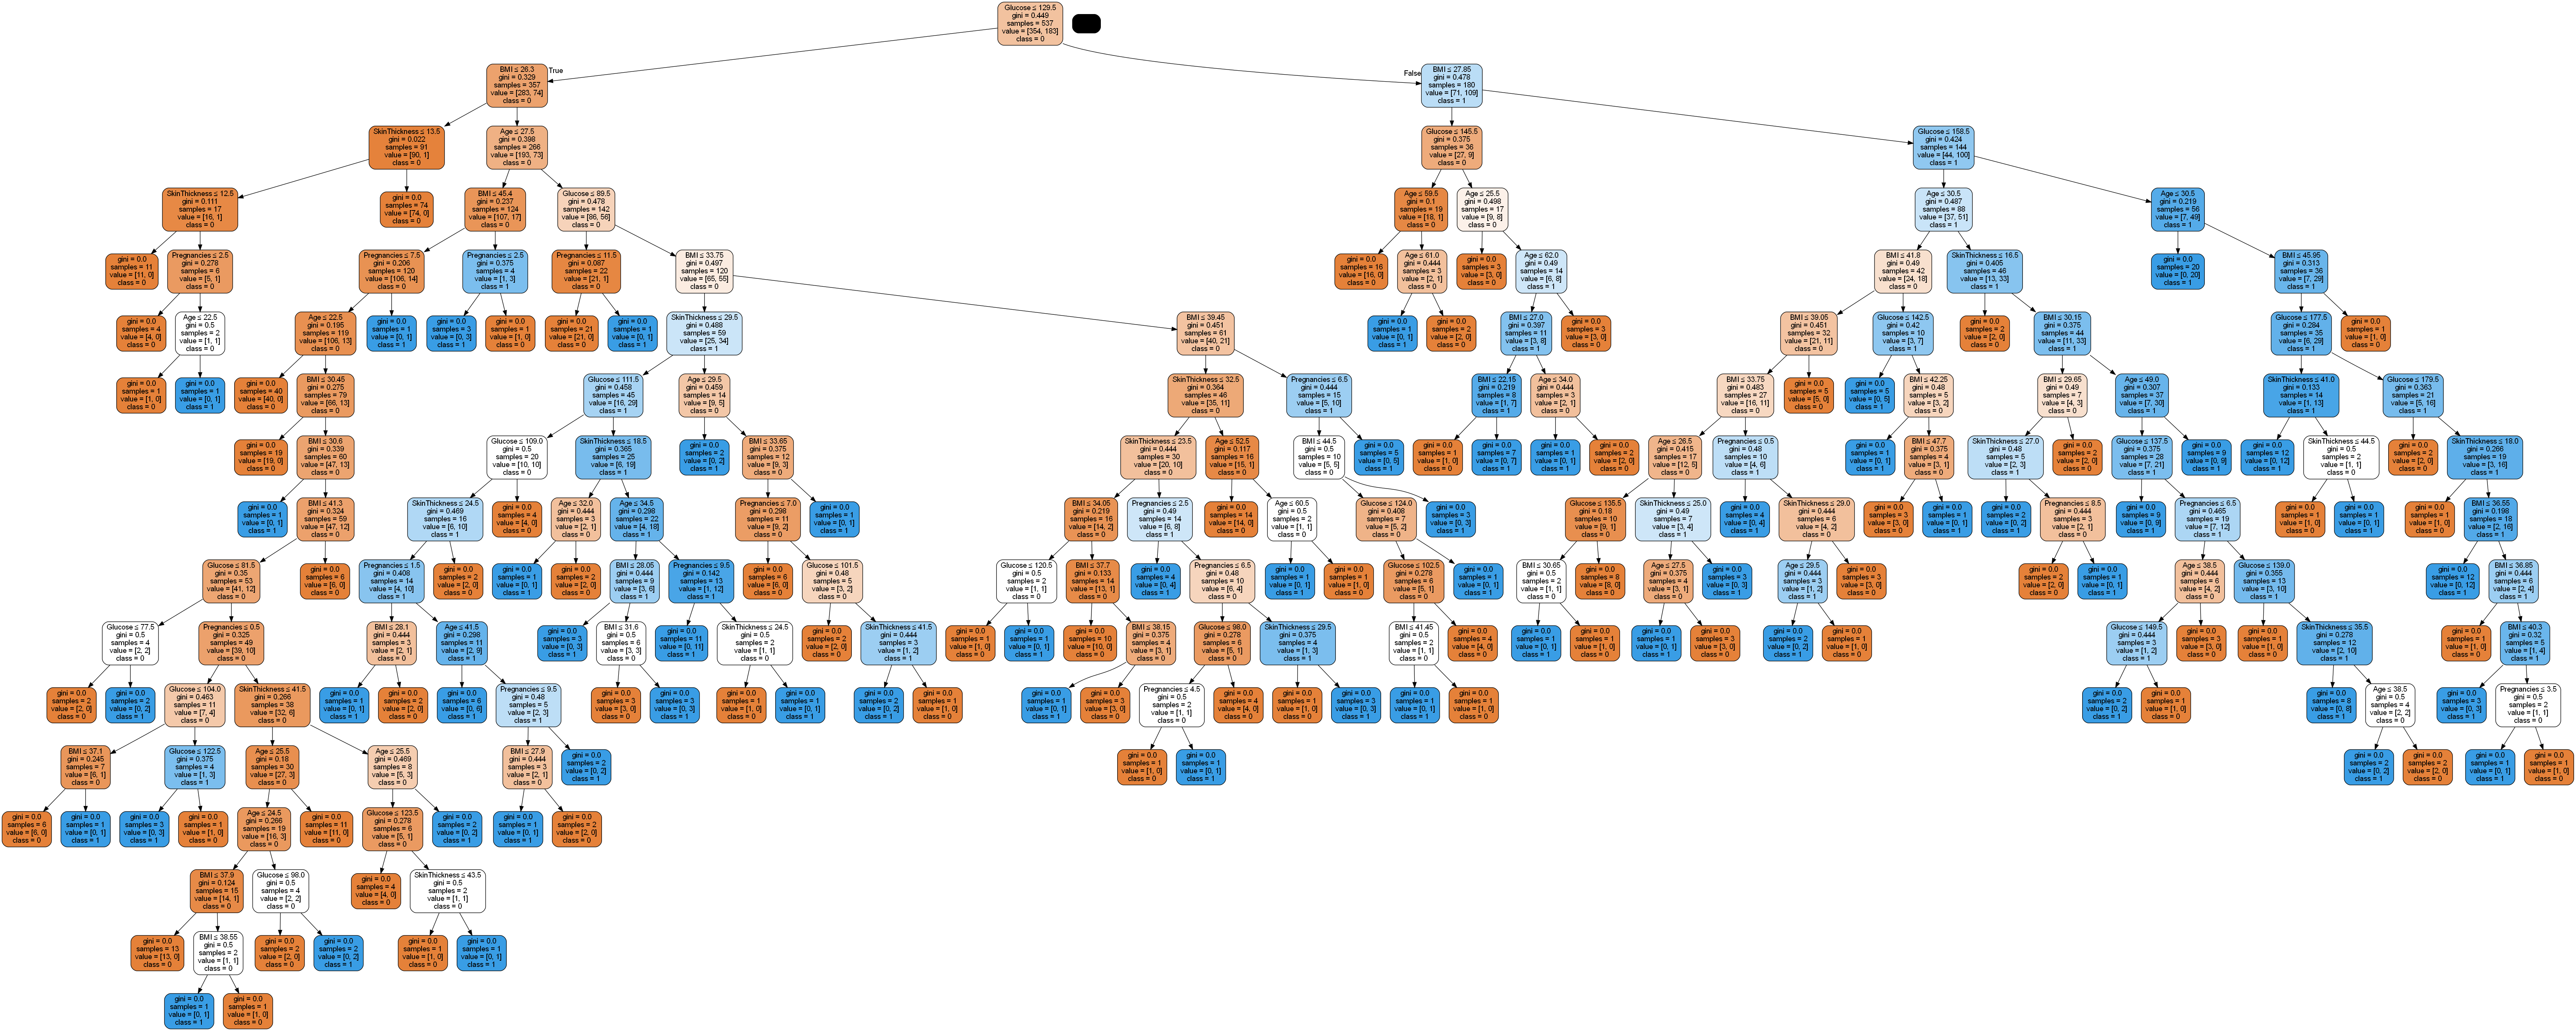

In [61]:
#feature_cols = ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())